# Introducción a Deep Learning con Lasagne

## Antes un repaso de conceptos ..
### Aprendizaje Supervisado

La forma más comun de *machine learning*, sea profundo o no, es el aprendizaje supervisado.
Si queremos realizar un clasificador a partir de imagenes, vamos a recolectar las mismas y asociarles una etiqueta. En etapa de entrenamiento, una imagen es mostrada al clasificador y este genera una salida en forma de vector con *scores*, uno para cada categoría. La idea es que la categoría deseada tenga el *score* más alto posible. 

Durante el entrenamiento calculamos una función objetivo que mide el error o distancia entre los *scores* que genera nuestro clasificador y los valores reales. Con el resultado de esta función, el clasificador modifica sus parametros para reducir este error. Estos parametros, usualmente llamados pesos, se pueden ver como "perillas" que definen la función entrada-salida de nuestro clasificador.

![knobs](images/knobs.jpg "knobs")

TODO

<!---To properly adjust the weight vector, the learning algorithm computes a gradient vector that, for each weight, indicates by what amount the error would increase or decrease if the weight were increased by a tiny amount. The weight vector is then adjusted in the opposite direction to the gradient vector.

The objective function, averaged over all the training examples, can be seen as a kind of hilly landscape in the high-dimensional space of weight values. The negative gradient vector indicates the direction of steepest descent in this landscape, taking it closer to a minimum, where the output error is low on average.
In practice, most practitioners use a procedure called stochastic gradient descent (SGD). This consists of showing the input vector for a few examples, computing the outputs and the errors, computing the average gradient for those examples, and adjusting the weights accordingly. The process is repeated for many small sets of examples
from the training set until the average of the objective function stops decreasing. It is called stochastic because each small set of examples gives a noisy estimate of the average gradient over all examples. This
simple procedure usually finds a good set of weights surprisingly quickly when compared with far more elaborate optimization techniques18. After training, the performance of the system is measured on a different set of examples called a test set. This serves to test the generalization ability of the machine — its ability to produce sensible answers on new inputs that it has never seen during training.--->



#### Stochastic Gradient Descent

![alt text](images/saddle_point_evaluation_optimizers.gif "gif de http://sebastianruder.com/optimizing-gradient-descent/")
Grafico de http://sebastianruder.com/optimizing-gradient-descent/
#### Nesterov Momentum

#### Backpropagation

![alt text](images/deeplearning.jpg "dl")

### Qué es Deep Learning ?

Deep learning permite que modelos computacionales compuestos por varias capas de procesamiento puedan aprender representaciones sobre datos con múltiples niveles de abstracción y, mediante esto, descubrir representaciones precisas en grandes volúmenes de datos de forma autónoma. 
Particularmente, Convolutional Neural Networks (ConvNets) constituyen el estado del arte de varios problemas de visión computacional, dado su gran desempeño de clasificación en grandes volúmenes de imágenes. Su gran performance está basada en cuatro ideas basales: conexiones locales, pesos compartidos, pooling y el uso de varias capas. 
![alt text](images/capas_de_abstracci.png "structure")


### ConvNets
Una arquitectura clásica de ConvNet esta dada por dos etapas. La primer etapa se enfoca en **extraer características discriminantes** a distintos niveles de abstracción y la segunda se enfoca en la **clasificación** a partir de las características obtenidas previamente. La primera instancia esta compuesta por dos tipos de capas: de convolución y *pooling*.

<!---Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. --->

![alt text](images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

#TODO
### CHANNN
These choices are called hyperparameters and they come up very often in the design of many Machine Learning algorithms that learn from data. It’s often not obvious what values/settings one should choose.

You might be tempted to suggest that we should try out many different values and see what works best. That is a fine idea and that’s indeed what we will do, but this must be done very carefully. In particular, we cannot use the test set for the purpose of tweaking hyperparameters. Whenever you’re designing Machine Learning algorithms, you should think of the test set as a very precious resource that should ideally never be touched until one time at the very end. Otherwise, the very real danger is that you may tune your hyperparameters to work well on the test set, but if you were to deploy your model you could see a significantly reduced performance. In practice, we would say that you overfit to the test set. Another way of looking at it is that if you tune your hyperparameters on the test set, you are effectively using the test set as the training set, and therefore the performance you achieve on it will be too optimistic with respect to what you might actually observe when you deploy your model. But if you only use the test set once at end, it remains a good proxy for measuring the generalization of your classifier (we will see much more discussion surrounding generalization later in the class).

![alt text](images/crossval.jpeg "image from http://cs231n.github.io/classification/")

### Tipos de Capas

In [ ]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

#### Capas Densas

Todas las unidades ocultas estan conectadas con todas las unidades de entrada!

In [ ]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

#### Capas de Convolución

En las capas de convolución, las unidades estan organizadas en feature maps, en las cuales cada unidad
esta conectada a patches locales de los feature maps pertenecientes a la capa anterior mediante un conjunto de pesos, llamadosfilter bank. Todas las unidades dentro de un feature map comparten el mismo filter bank, distintos feature maps dentro de la misma capa usan diferentes filter banks, la disposición de estos tiene dos justificaciones, por un lado, datos en forma de arreglos, como en nuestro caso, imágenes, subconjuntos locales tienden a estar altamente correlacionados y por otro lado la estadística local de las imágenes son invariantes a su ubicación.



![alt text](images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
*http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [ ]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

#### Max Pooling
Para reducir la dimensionalidad de los *feature maps*, una capa de *pooling* es ubicada entre las capas de convolución. Las capas de *pooling* eliminan los valores no máximos calculando una función de agregación, comunmente se utiliza el maximo o el promedio sobre pequeñas regiones de la entrada. El proposito general de las capas de *pooling* es reducir el costo computacional en las capas ulteriores, reduciendo el tamaño de los futuros mapas de características y otorgando una forma de invariancia traslacional.


![alt text](images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

In [ ]:
(MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout es una técnica que previene que una red caiga en *overfitting* y provee una manera de combinar de forma eficiente varias arquitecturas de redes neuronales juntas.
El termino de dropout se refiere al descarte de unidades y sus conexiones (ya sea en capas ocultas o no) en una red neuronal, este descarte es solo temporal. La forma de elección de descarte es aleatoria, a cada unidad se le asocia un valor de probabilidad p independiente del resto entre [0, 1].
![alt text](images/dropout.png " imagen de XXXXX")

In [ ]:
(DropoutLayer, {'p': 0.5})

## Lasagne


In [ ]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

# Clasifiquemos el tipo de nave que aparece en la imagen!

In [ ]:
from IPython.display import Image
Image(filename='images/ships.png') 

# Cómo son nuestros datos de entrada?
![alt text](images/dataset.png)

#### Cargando Imágenes a un Dataframe

In [1]:
import os
import pandas as pd
import cv2

In [2]:
def images_to_file(path_to_photos):
    """ """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print catenc
    df_out.to_csv('./star_wars_data.csv')
    return df_out

In [ ]:
images_to_file("data/all/")

#### Cómo quedo el archivo que generamos?

In [ ]:
!more ./star_wars_data.csv

#### Ahora a darle formato a nuestros datos para nuestra red ...

In [3]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [4]:
def load(images_dir="data/all/"):
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

#### Qué necesitamos para armar nuestras redes ??

In [5]:
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import BatchIterator
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)
/usr/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


#### Cómo se define la arquitectura de nuestra red ?!

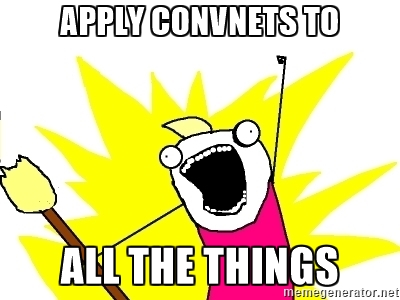

In [17]:
from IPython.display import Image
Image(filename='images/convnets.jpg', width=300)

In [30]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 128, 128)}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 3}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 2}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 100, 'nonlinearity': lasagne.nonlinearities.rectify}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ],
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.03)),
        update_momentum=theano.shared(np.float32(0.9)),
        regression=False,
        #batch_iterator_train=FlipBatchIterator(batch_size=50),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

In [23]:
x, y = load()
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print X_train.shape

(array([0, 1, 1, ..., 0, 0, 1]), Index([u'falcon', u'lambda', u'kwing'], dtype='object'))
(2924, 1, 128, 128)


In [31]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 1539203 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x126x126
  2  maxpool2d2  16x63x63
  3  conv2d3     16x62x62
  4  maxpool2d4  16x31x31
  5  dense5      100
  6  dropout6    100
  7  dense7      3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.09161       1.05312      1.03655      0.71980  2.50s
      2       0.98763       0.94244      1.04795      0.57673  2.48s
      3       0.72460       0.49375      1.46753      0.83938  2.47s
      4       0.45493       0.27546      1.65152      0.91402  2.47s
      5       0.28274       0.13887      2.03595      0.95741  2.47s
      6       0.17567       0.11039      1.59142      0.96171  2.47s
      7       0.09629       0.20471      0.47036      0.93397  2.47s
      8       0.09770       0.06892      1.41748      0.97695 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fed15491110>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fed15491090>,
     custom_score=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 3, 'num_filters': 16}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 2, 'n....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7fed1571a5f0>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7fed15507410>,
     objective_loss_function=<function categorical_crossentropy at 0x7fed154d55f0>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fece2104c68>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.Pr

In [40]:
net.objective_loss_function

<function lasagne.objectives.categorical_crossentropy>

#### Y para chequear nuestros resultados??

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

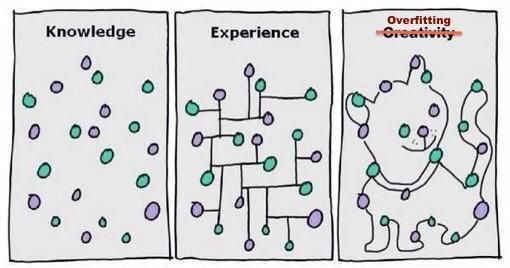

In [13]:
from IPython.display import Image
Image(filename='images/overfitting.jpg') 

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

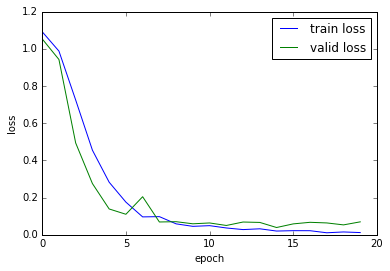

In [32]:
%matplotlib inline
visualize.plot_loss(net)

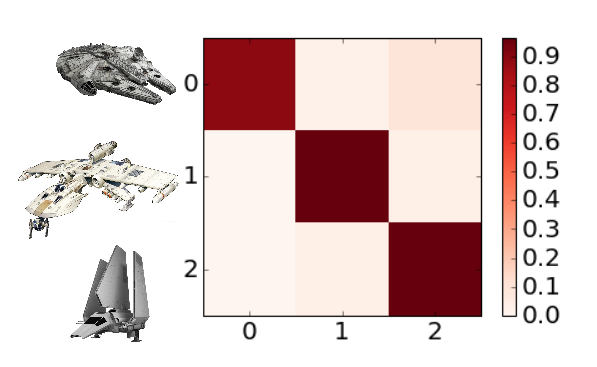

In [33]:
from IPython.display import Image
Image(filename='images/confusion_matrix.png', width=300) 

In [34]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Reds)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.99393939  0.          0.00606061]
 [ 0.00422833  0.99365751  0.00211416]
 [ 0.00221729  0.00443459  0.99334812]]
[[328   0   2]
 [  2 470   1]
 [  1   2 448]]


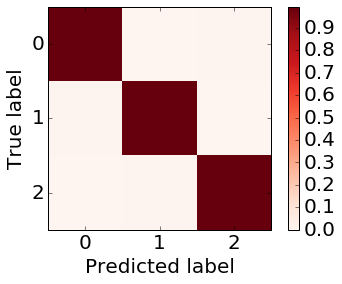

In [35]:
plot_matrix(net, X_test, y_test)
print confusion_matrix(y_test, net.predict(X_test))

In [ ]:
#visualize.plot_conv_weights(net.layers_[3])

### Tengo que entrenar mi red cada vez que quiero usarla?? 
Como guardar y abrir nuestras redes entrenadas

In [19]:
import cPickle as pickle

with open('data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)


In [20]:
net_loaded = None
with open('data/ship_classifier.pickle', 'rb') as f:
       net_loaded = pickle.load(f)

In [21]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net_loaded.verbose = 3
net_loaded.initialize()
layer_info(net_loaded)



# Neural Network with 1539203 learnable parameters

## Layer information

name        size          total    cap.Y    cap.X    cov.Y    cov.X    filter Y    filter X    field Y    field X
----------  ----------  -------  -------  -------  -------  -------  ----------  ----------  ---------  ---------
input0      1x128x128     16384   100.00   100.00   100.00   100.00         128         128        128        128
conv2d1     16x126x126   254016   100.00   100.00     2.34     2.34           3           3          3          3
maxpool2d2  16x63x63      63504   100.00   100.00     2.34     2.34           3           3          3          3
conv2d3     16x62x62      61504    80.00    80.00     3.91     3.91           4           4          5          5
maxpool2d4  16x31x31      15376    80.00    80.00     3.91     3.91           4           4          5          5
dense5      100             100   100.00   100.00   100.00   100.00         128         128        128        128
dropout6    10

### Qué pasa dentro de la red?

In [59]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 3, 'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.rectify>,
   'num_units': 100}),
 (lasagne.layers.noise.DropoutLayer, {'p': 0.5}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

<IPython.core.display.Javascript object>


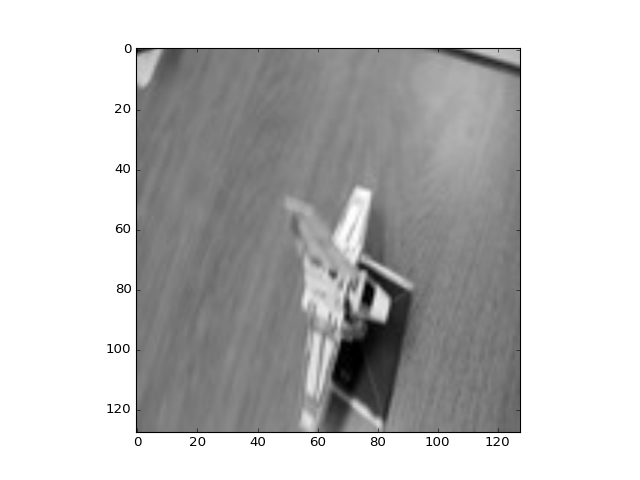

In [60]:
%matplotlib notebook
plt.imshow(X_test[1][0], cmap='gray')

In [85]:
my_image = cv2.imread("data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)


In [86]:
net.predict(X)

array([2])

In [93]:
net.predict_proba(X)[0, 2]

0.99993074

<IPython.core.display.Javascript object>


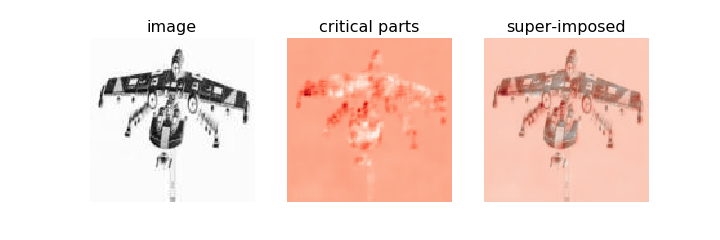

In [90]:
h = visualize.plot_occlusion(net, X, [2], square_length=3)

<IPython.core.display.Javascript object>


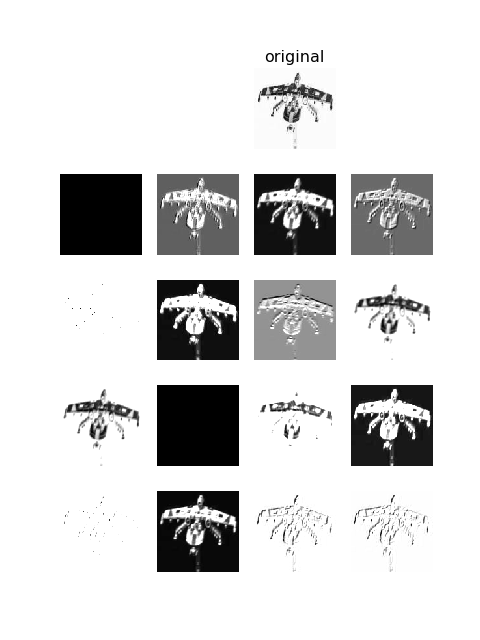

In [91]:
visualize.plot_conv_activity(net.layers_['conv2d1'], X)

### Ahora usemos nuestra red para clasificar desde video!!

In [21]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

#### Mostrando el resultado frame por frame

In [28]:
import time
import cv2

def classifier_over_video(file_name, d_path):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    #clase = []
    #cv2.startWindowThread()
    
    for frame_id in range(int(frames_count)):
        #time.sleep(0.01)
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        #clase.append(net.predict(X))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, tipos_naves[net.predict(X)[0]], (10,500), font, 4,(255,255,255), 2, cv2.LINE_AA)
        cv2.imshow('frame',frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [49]:
classifier_over_video("/tmp/VID_20160826_134808.mp4", "/tmp/")

#### Con una pequeña trampa podemos tener una idea mas estable sobre el video ...

In [50]:
import time
import cv2
from collections import Counter

tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}
def classifier_over_video_most_common(file_name, d_path):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X)[0])
        font = cv2.FONT_HERSHEY_SIMPLEX
        mi_nave_frecuente = Counter(clase).most_common(1)[0][0]
        cv2.putText(frame, tipos_naves[mi_nave_frecuente], (10,500), font, 4,(255,255,255), 2, cv2.LINE_AA)
        cv2.imshow('frame',frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [51]:
classifier_over_video_most_common("/tmp/VID_20160826_134808.mp4", "/tmp/")

### Ahora armemos una red para regresion

In [8]:
data_coordinates = pd.read_json("/home/celia/Desktop/otro.json")

In [9]:
annotations = data_coordinates.drop(['class'], axis=1)

In [10]:
for i in range(annotations.shape[0]):
    if annotations['annotations'][i] == []:
        annotations['annotations'][i] = np.nan

In [11]:
annotations['filename'] = annotations['filename'].apply(lambda x: os.path.basename(x))
non_nan = annotations.dropna()
annotations.shape, non_nan.shape


((3766, 2), (354, 2))

In [12]:
non_nan.index.values

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [13]:
def images_to_file_coordinates():
    """ """
    #ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    ids = non_nan['filename'].values
    
    df_out = pd.DataFrame(columns=['Image', 'x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2'], index=ids)
    for i, image_file in zip(non_nan.index.values, ids):
            image = cv2.imread(os.path.join('data/all', image_file), 0)
            df_out['Image'][image_file] = ' '.join(map(str, image.flatten()))
            df_out['x_0'][image_file] = non_nan['annotations'][i][0]['x']
            df_out['y_0'][image_file] = non_nan['annotations'][i][0]['y']
            df_out['x_1'][image_file] = non_nan['annotations'][i][1]['x']
            df_out['y_1'][image_file] = non_nan['annotations'][i][1]['y']
            df_out['x_2'][image_file] = non_nan['annotations'][i][2]['x']
            df_out['y_2'][image_file] = non_nan['annotations'][i][2]['y']
    df_out.to_csv('./star_wars_data_coordinates.csv')
    return df_out

In [34]:
from sklearn import preprocessing

def load_coordinates():
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file_coordinates()
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df[['x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2']].values
    
    minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
    y = minmax.fit_transform(y)
    
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
    return X, y, minmax

In [35]:
X_coor, y_coor, minmax = load_coordinates()

In [36]:
from lasagne import layers

def create_net_coordinate():
    l = layers.InputLayer(shape=(None, 1, 128, 128))
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    l = layers.DropoutLayer(l, p=0.1)
    l = layers.Conv2DLayer(l, num_filters= 32, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    l = layers.DropoutLayer(l, p=0.2)
    #l = layers.Conv2DLayer(l, num_filters= 128, filter_size=(4, 4))
    #l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.3)
    #l = lasagne.layers.LSTMLayer(l, 512)
    l = layers.DenseLayer(l, num_units=512)
    l = layers.DropoutLayer(l, p=0.5)
    l = layers.DenseLayer(l, num_units=512)
    l = layers.DenseLayer(l, num_units=6, nonlinearity=None)

    return NeuralNet(
        l,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.06)),
        update_momentum=theano.shared(np.float32(0.9)),

        regression=True,
        #batch_iterator_train=FlipBatchIterator(batch_size=178),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.01, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=100,
        verbose=1)

In [37]:
X_coor = X_coor.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(X_coor, y_coor,
                                                            test_size=0.2,
                                                            random_state=42)
net_coor = create_net_coordinate()

In [38]:
net_coor.fit(X_train, y_train)

# Neural Network with 15016646 learnable parameters

## Layer information

  #    name  size
---  ------  ----------
  0          1x128x128
             16x126x126
             16x63x63
             16x63x63
             32x61x61
             32x30x30
             32x30x30
             512
             512
             512
             6

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.18759       0.16236      1.15539  0.38s
      2       0.16718       0.15278      1.09423  0.38s
      3       0.15254       0.14631      1.04257  0.37s
      4       0.14269       0.13353      1.06865  0.37s
      5       0.13643       0.11881      1.14831  0.37s
      6       0.11903       0.10127      1.17538  0.37s
      7       0.10673       0.08848      1.20627  0.37s
      8       0.10569       0.08474      1.24732  0.37s
      9       0.09646       0.08409      1.14711  0.37s
     10       0.08794       0.08366      1.05

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f838998c2d0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f838998c250>,
     custom_score=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7f8369dea690>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f8389988e60>,
     objective_loss_function=<function squared_error at 0x7f83899dd1b8>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f8369a927a0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f836a12e5a8>],
     regression=True,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7f838998c310>,
     update=<function nesterov_momentum at 0x7f83899dda28>,
     update_learning_rate=<TensorType(float32, scalar)>,
     update_momentum=<TensorType(float32, scalar)>,
     use_label_encoder=False, verbo

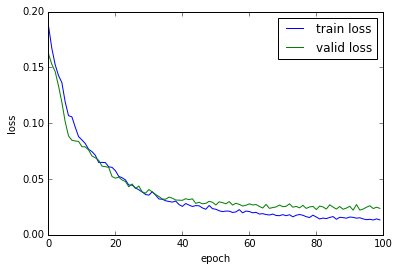

In [39]:
%matplotlib inline
visualize.plot_loss(net_coor)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_pred = net_coor.predict(X_test)
print np.sqrt(mean_squared_error(y_test, y_pred))
print explained_variance_score(y_test.ravel(), y_pred.ravel())
print mean_absolute_error(y_test, y_pred)
print r2_score(y_test, y_pred) 

0.191907
0.795743912458
0.110747
0.78957261033


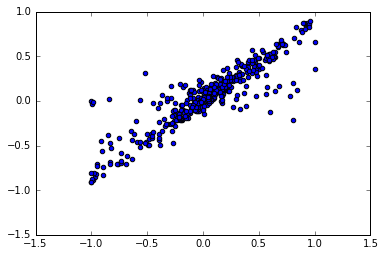

(0.89768571, 5.3049067815780668e-153)

In [41]:
from scipy.stats import pearsonr
plt.clf()
plt.scatter(y_test, net_coor.predict(X_test))
plt.show()
pearsonr(y_test.ravel(), net_coor.predict(X_test).ravel())

In [42]:
def plot_sample(img, y, axis, move=48):
    axis.imshow(img, cmap='gray')
    #axis.scatter(y[0::2], y[1::2], marker='x', s=5)

    axis.scatter(y[0::2], y[1::2], marker='x', s=5)

In [44]:
minmax.inverse_transform?

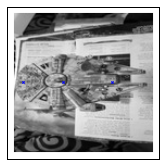

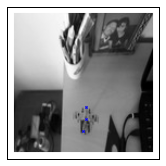

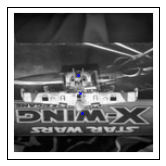

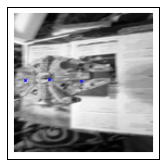

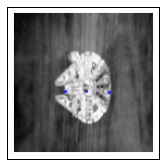

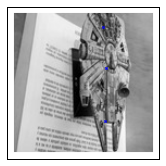

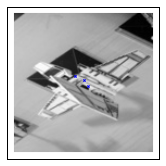

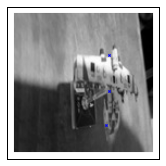

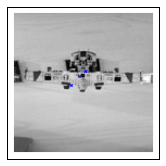

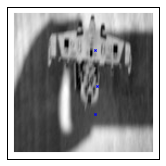

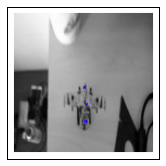

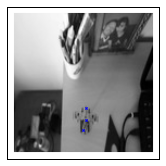

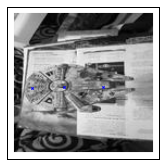

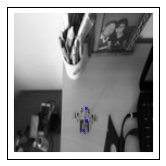

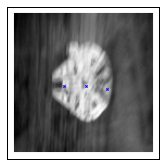

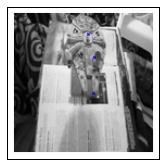

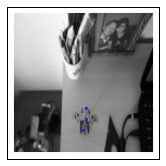

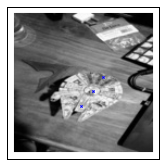

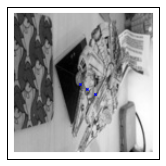

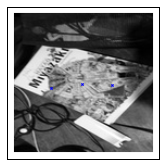

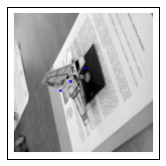

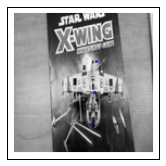

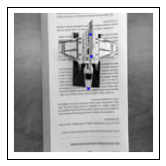

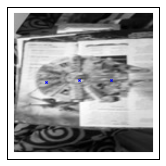

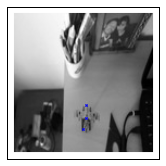

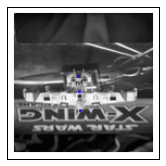

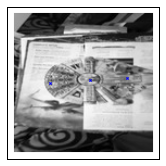

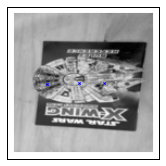

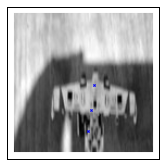

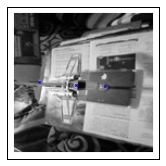

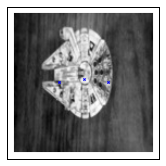

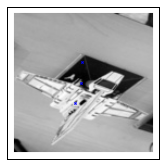

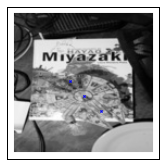

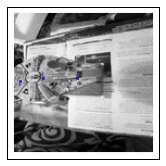

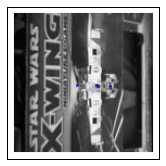

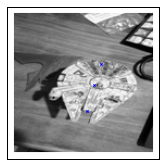

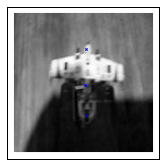

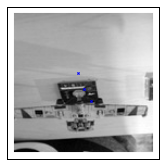

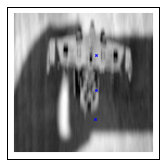

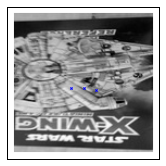

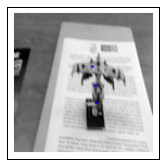

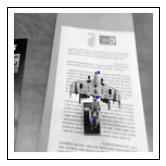

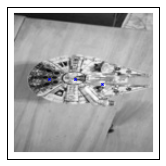

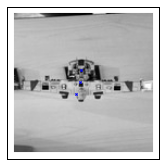

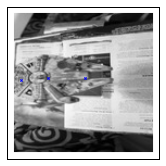

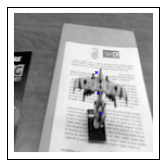

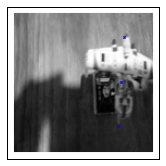

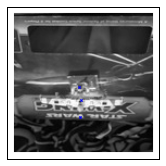

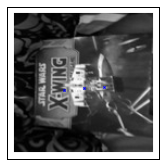

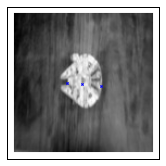

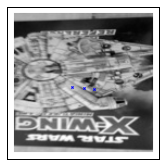

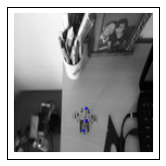

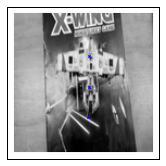

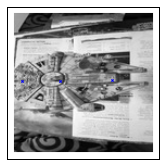

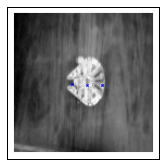

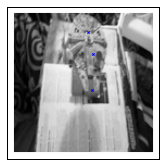

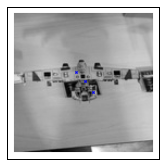

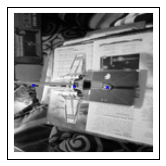

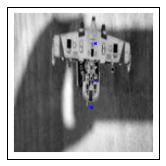

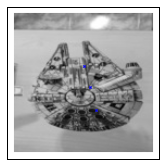

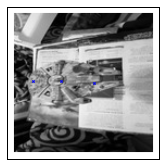

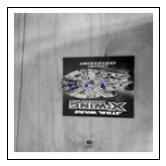

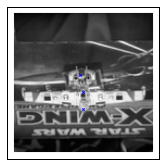

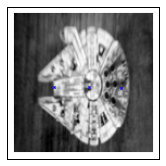

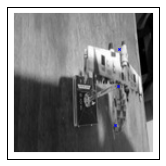

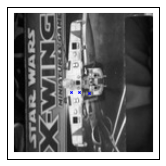

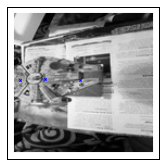

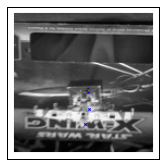

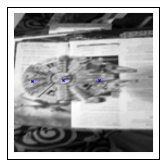

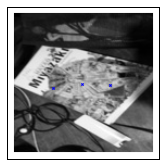

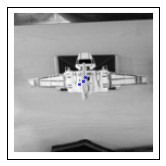

In [47]:

for i in range(X_test.shape[0]):
    plt.clf()
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    img = X_test[i].reshape(128, 128)
    plot_sample(img, minmax.inverse_transform(y_pred[i]), ax)
    plt.show()